In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#READING THE DATA from kaggle

https://www.kaggle.com/dalpozz/creditcardfraud
    

In [53]:
data=pd.read_csv("creditcard.csv")

In [54]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [39]:
data.shape

(284807, 31)

#understanding the target variable

In [5]:
target_count=pd.value_counts(data['Class'],sort=True).sort_index()

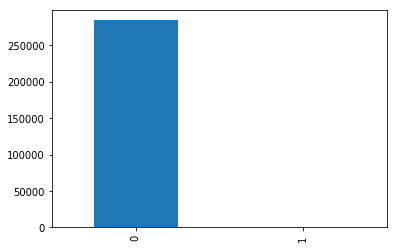

In [7]:
%matplotlib inline
target_count.plot(kind='bar')

#analysing the fraud and genuine transaction counts

In [8]:
count_genuine_transaction=len(data[data["Class"]==0])

count_fraud_transaction=len(data[data["Class"]==1])

normal_transactions_percent=count_genuine_transaction/(count_genuine_transaction+count_fraud_transaction)

In [12]:
print(normal_transactions_percent)

0.9982725143693799


In [13]:
fraud_transactions_percent=count_fraud_transaction/(count_genuine_transaction+count_fraud_transaction)

In [14]:
print(fraud_transactions_percent)

0.001727485630620034


#visualising the target variable

In [15]:
fraud_trans=data[data["Class"]==1]

In [23]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#creating an id for each row to reference it - just like a customer id

In [24]:
data.insert(0, 'id', range(0, 0 + len(data)))
data

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [25]:
data.dtypes

id          int64
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

#dropping the target to extract the features

In [26]:
data.drop(['Class'],axis = 1, inplace = True)

In [27]:
X = data.iloc[:].values

#feature scaling using sklearn

In [28]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range = (0,1))

In [29]:
X = sc.fit_transform(X)

implementing Self organising maps using minisom class

In [30]:
from minisom import MiniSom

Setting up the dimensions of the map
hyper parameters: sigma - kept as default
learning rate- 0.3 changed from 1
initializing the weights randomly close to zero
training the model for 100 iterations     


In [41]:
som = MiniSom(x = 10, y = 10, input_len = 31, sigma = 1.0, learning_rate = 0.3)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

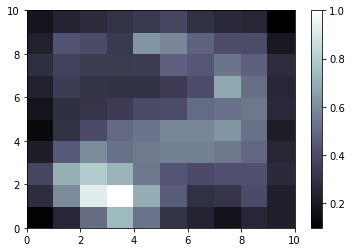

In [42]:
from pylab import bone, pcolor, colorbar, plot, show

bone()
pcolor(som.distance_map().T)
colorbar()

mapping the features of the data!

In [43]:
mappings = som.win_map(X)

In [44]:
len(mappings)

100

mapping the fraud transactions!

In [45]:
fraud=mappings[(3,1)]
fraud = sc.inverse_transform(fraud)
len(fraud)

1657

creating the dataframe for the fraud transactions

In [46]:
data_fraud=pd.DataFrame(fraud)
data_fraud.head()


,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,121317.0,76148.0,1.243817,-1.923951,1.543921,-0.763833,-2.677518,0.170466,-1.941986,0.261369,...,-0.279039,-0.183333,0.027704,-0.072622,0.391480,0.288776,-0.049415,0.085739,0.045044,96.00
1,122127.0,76445.0,1.518689,-1.046429,-0.211292,-1.423336,-1.336648,-1.099005,-0.755863,-0.102947,...,-0.530484,-0.156769,-0.228653,-0.055959,0.257023,0.549703,-0.090512,-0.026453,-0.010353,12.00
2,123089.0,76805.0,-0.979885,0.785044,2.026104,1.667170,-0.835843,0.753813,-0.483324,0.962580,...,-0.091595,-0.351264,-0.658806,-0.002318,0.031010,-0.094971,-0.361838,0.308025,0.107793,9.99
3,123506.0,76957.0,0.387091,-1.512728,0.901183,1.956212,-1.606877,0.172047,-0.305278,0.157423,...,0.517791,0.321690,0.338529,-0.497014,0.419472,0.485191,-0.150452,-0.003561,0.095639,395.00
4,123709.0,77033.0,-2.523739,-0.720122,1.508034,0.835839,1.096848,-0.783538,-1.067556,-2.874562,...,-1.429223,1.680829,-1.048594,-0.536229,0.551138,-0.754797,0.207350,0.141075,-0.376158,49.54


referencing the id that is the customer id to identify the fraud customers!

In [47]:
data_fraud.rename(columns={0: 'id'}, inplace=True)
data_fraud.head()

,id,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,121317.0,76148.0,1.243817,-1.923951,1.543921,-0.763833,-2.677518,0.170466,-1.941986,0.261369,...,-0.279039,-0.183333,0.027704,-0.072622,0.391480,0.288776,-0.049415,0.085739,0.045044,96.00
1,122127.0,76445.0,1.518689,-1.046429,-0.211292,-1.423336,-1.336648,-1.099005,-0.755863,-0.102947,...,-0.530484,-0.156769,-0.228653,-0.055959,0.257023,0.549703,-0.090512,-0.026453,-0.010353,12.00
2,123089.0,76805.0,-0.979885,0.785044,2.026104,1.667170,-0.835843,0.753813,-0.483324,0.962580,...,-0.091595,-0.351264,-0.658806,-0.002318,0.031010,-0.094971,-0.361838,0.308025,0.107793,9.99
3,123506.0,76957.0,0.387091,-1.512728,0.901183,1.956212,-1.606877,0.172047,-0.305278,0.157423,...,0.517791,0.321690,0.338529,-0.497014,0.419472,0.485191,-0.150452,-0.003561,0.095639,395.00
4,123709.0,77033.0,-2.523739,-0.720122,1.508034,0.835839,1.096848,-0.783538,-1.067556,-2.874562,...,-1.429223,1.680829,-1.048594,-0.536229,0.551138,-0.754797,0.207350,0.141075,-0.376158,49.54


In [55]:
data.insert(0, 'id', range(0, 0 + len(data)))
data

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


extracting the customers list from data to train the Multi layer perceptron

now we use supervised deep learning algorithm to predict the probability of fraud 

In [56]:
customers = data.iloc[:, 1:].values


creating a new column in the data 'is_fraud' to identify and map the fraud customers 
in the data and create a dependent variable

In [57]:
is_fraud = np.zeros(len(data))
for i in range(len(data)):
    if data.iloc[i,0] in fraud:
        is_fraud[i] = 1


#feature scaling

In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

#importing the MLP dependencies using keras library and tensorflow as backend

In [63]:
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

Using TensorFlow backend.


In [64]:


# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu', 
                     input_dim = 31))

classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))

classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [106]:
# Fitting the ANN to the Training set
classifier.fit(customers, is_fraud, batch_size = 25, epochs = 20)


Epoch 1/20
284807/284807 [==============================] - 52s - loss: 0.0416 - acc: 0.9895    
Epoch 2/20
284807/284807 [==============================] - 52s - loss: 0.0413 - acc: 0.9897    
Epoch 3/20
284807/284807 [==============================] - 51s - loss: 0.0413 - acc: 0.9897    
Epoch 4/20
284807/284807 [==============================] - 50s - loss: 0.0411 - acc: 0.9896    
Epoch 5/20
284807/284807 [==============================] - 50s - loss: 0.0410 - acc: 0.9897    
Epoch 6/20
284807/284807 [==============================] - 51s - loss: 0.0410 - acc: 0.9897    
Epoch 7/20
284807/284807 [==============================] - 51s - loss: 0.0409 - acc: 0.9896    
Epoch 8/20
284807/284807 [==============================] - 51s - loss: 0.0409 - acc: 0.9896    
Epoch 9/20
284807/284807 [==============================] - 51s - loss: 0.0406 - acc: 0.9897    
Epoch 10/20
284807/284807 [==============================] - 51s - loss: 0.0405 - acc: 0.9897    
Epoch 11/20
284807/284807 [==

In [107]:
# Predicting the probabilities of frauds
y_pred = classifier.predict(customers)

The multilayer perceptron using the feature mappings from the Self organising maps 

is trained and for 20 epochs the accuracy managed by the algorithm is 98.98%.